In [72]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [35]:
csv = pd.read_csv(r"C:\Users\stanx\Desktop\classification loan\loan_data.csv")
df = pd.DataFrame(csv)

train = df[:33750]
test = df[33750:]

In [ ]:
train

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
33750,40.0,female,Associate,102573.0,17,MORTGAGE,10000.0,EDUCATION,13.25,0.10,12.0,672,No,0
33751,27.0,male,Master,45473.0,4,RENT,7984.0,EDUCATION,10.99,0.18,10.0,679,Yes,0
33752,23.0,female,Master,61115.0,4,RENT,6000.0,MEDICAL,11.53,0.10,3.0,620,Yes,0
33753,26.0,female,Bachelor,139294.0,3,MORTGAGE,20000.0,EDUCATION,9.38,0.14,2.0,604,No,0
33754,31.0,female,Master,69118.0,9,MORTGAGE,22528.0,EDUCATION,9.53,0.33,7.0,699,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


<Axes: xlabel='credit_score'>

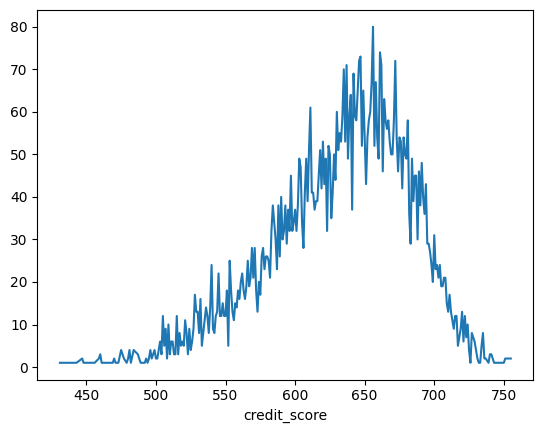

In [83]:
ones = train[train['loan_status'] == 1]
ones

creditCount = ones.groupby('credit_score').size()
creditCount.plot()
    

<Axes: xlabel='cb_person_cred_hist_length'>

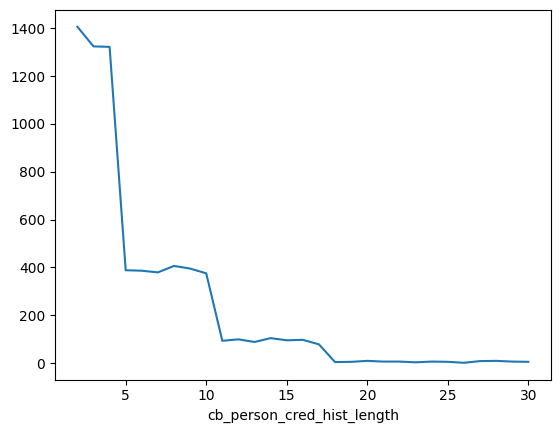

In [84]:
ones = train[train['loan_status'] == 1]
ones

histCount = ones.groupby('cb_person_cred_hist_length').size()
histCount.plot()




<Axes: xlabel='person_income'>

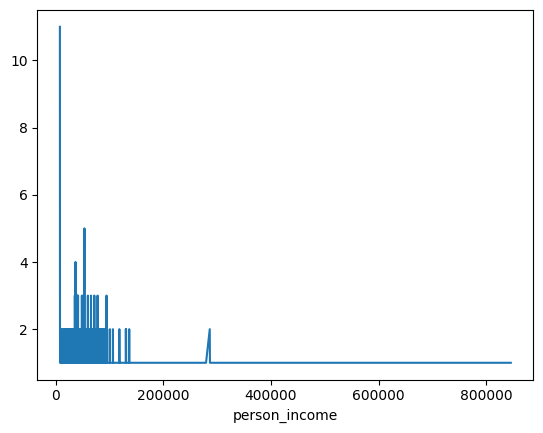

In [85]:
ones = train[train['loan_status'] == 1]
ones

incomeCount = ones.groupby('person_income').size()
incomeCount.plot()






<Axes: xlabel='person_age'>

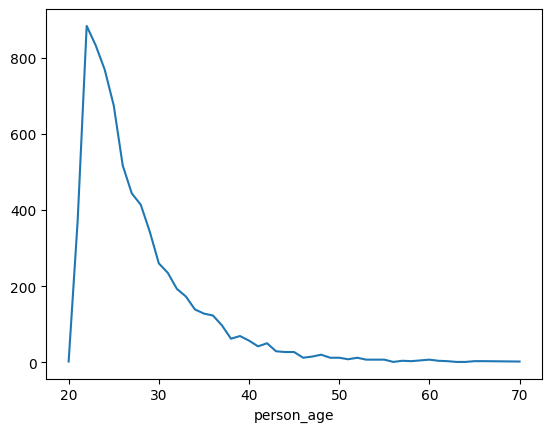

In [86]:
ones = train[train['loan_status'] == 1]
ones

ageCount = ones.groupby('person_age').size()
ageCount.plot()




In [134]:
neigh = KNeighborsClassifier(n_neighbors = 511)
x = train[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']]
y = train['loan_status']
neigh.fit(x, y)

train_pred = neigh.predict(train[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']])

train['knnClass'] = train_pred
train

train_accuracy = np.sum(np.count_nonzero(train['knnClass'] == train['loan_status'])) / len(train) * 100
train_accuracy

C:\Users\stanx\AppData\Local\Temp\ipykernel_9236\2348054728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['knnClass'] = train_pred


np.float64(80.78814814814815)

In [ ]:
test_pred = neigh.predict(test[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']])
test['knnClass'] = test_pred


test_accuracy = np.sum(np.count_nonzero(test['knnClass'] == test['loan_status'])) / len(test) * 100
test_accuracy



C:\Users\stanx\AppData\Local\Temp\ipykernel_9236\1065963025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['knnClass'] = test_pred


np.float64(76.67555555555555)

In [146]:

def accuracyTest(k):
    neigh = KNeighborsClassifier(n_neighbors = k)
    x = train[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']]
    y = train['loan_status']
    neigh.fit(x, y)


    test_pred = neigh.predict(test[['person_age', 'person_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_int_rate', 'loan_percent_income']])
    test['knnClass'] = test_pred


    test_accuracy = np.sum(np.count_nonzero(test['knnClass'] == test['loan_status'])) / len(test) * 100
    return test_accuracy

accurayK = np.array([])

for i in np.arange(3, 1021, 2):
    accurayK = np.append(accurayK, accuracyTest(i))



C:\Users\stanx\AppData\Local\Temp\ipykernel_9236\846654666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['knnClass'] = test_pred
C:\Users\stanx\AppData\Local\Temp\ipykernel_9236\846654666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['knnClass'] = test_pred
C:\Users\stanx\AppData\Local\Temp\ipykernel_9236\846654666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

(array([64]),)

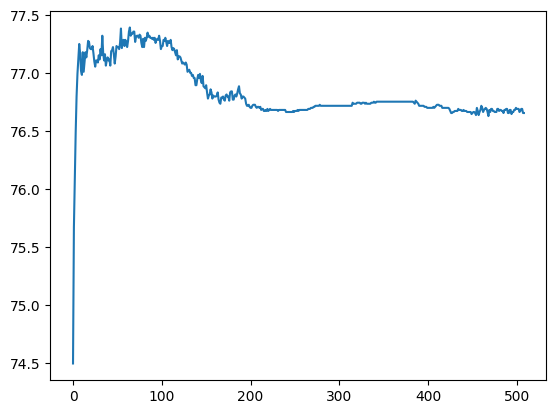

In [181]:
plt.plot(accurayK)

#fining the most optimal K value to maximize accuracy
maximumAcc = max(accurayK)
maxindex = 0

maxIndex = np.where(accurayK == maximumAcc)
maxIndex


In [183]:
print(accurayK[64])

2*64+3


77.39555555555555


131

In [185]:
#MOST ACCURATE k VALUE for KNN accuracy

accuracyTest(131)

C:\Users\stanx\AppData\Local\Temp\ipykernel_9236\846654666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['knnClass'] = test_pred


np.float64(77.39555555555555)